In [10]:
# importing the required packages

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# loading the data set
data = pd.read_csv("D:\\Data science\\INTERNSHIP\\Oasis infobyte\\task_2\\Unemployment in India.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [11]:
print(data.columns)
# there are few columns which have the space we can remove by re-arenging the names and save them again if required

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [12]:
# Summary statistics
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [13]:
# Preprocess and handling date format variations

data[' Date'] = pd.to_datetime(data[' Date'])
data['Year'] = data[' Date'].dt.year
data['Month'] = data[' Date'].dt.month
data['Day'] = data[' Date'].dt.day

# Drop rows with missing data
columns_with_missing_data = [
    'Region',
    ' Frequency',
    ' Estimated Unemployment Rate (%)',
    ' Estimated Employed',
    ' Estimated Labour Participation Rate (%)',
    'Area',
    'Year',
    'Month',
    'Day'
]
data = data.dropna(subset=columns_with_missing_data)

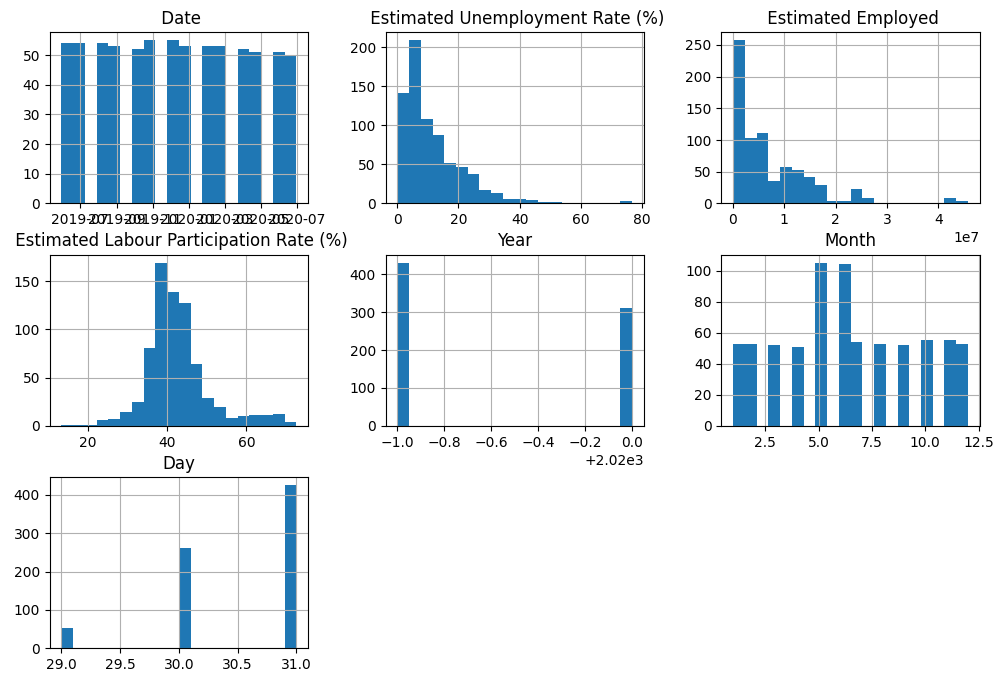

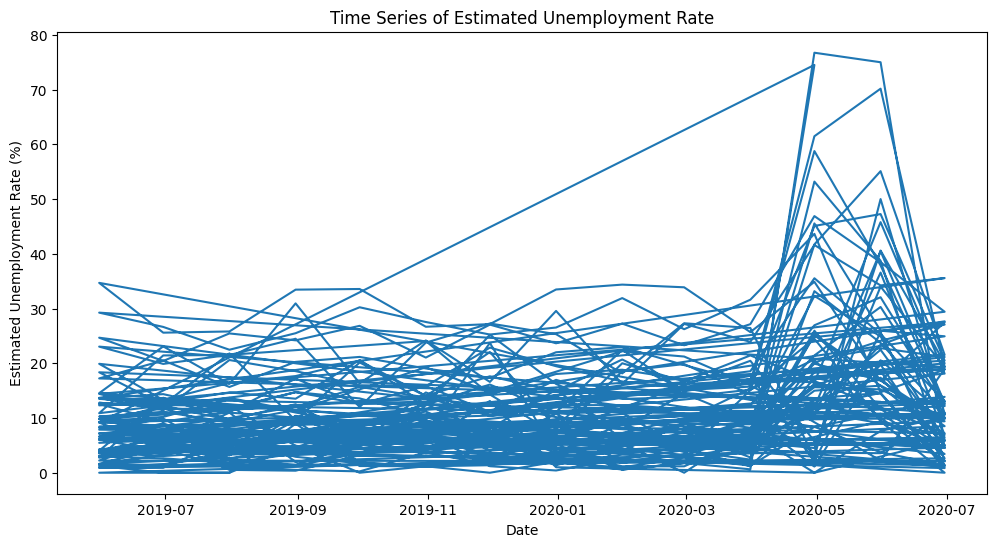

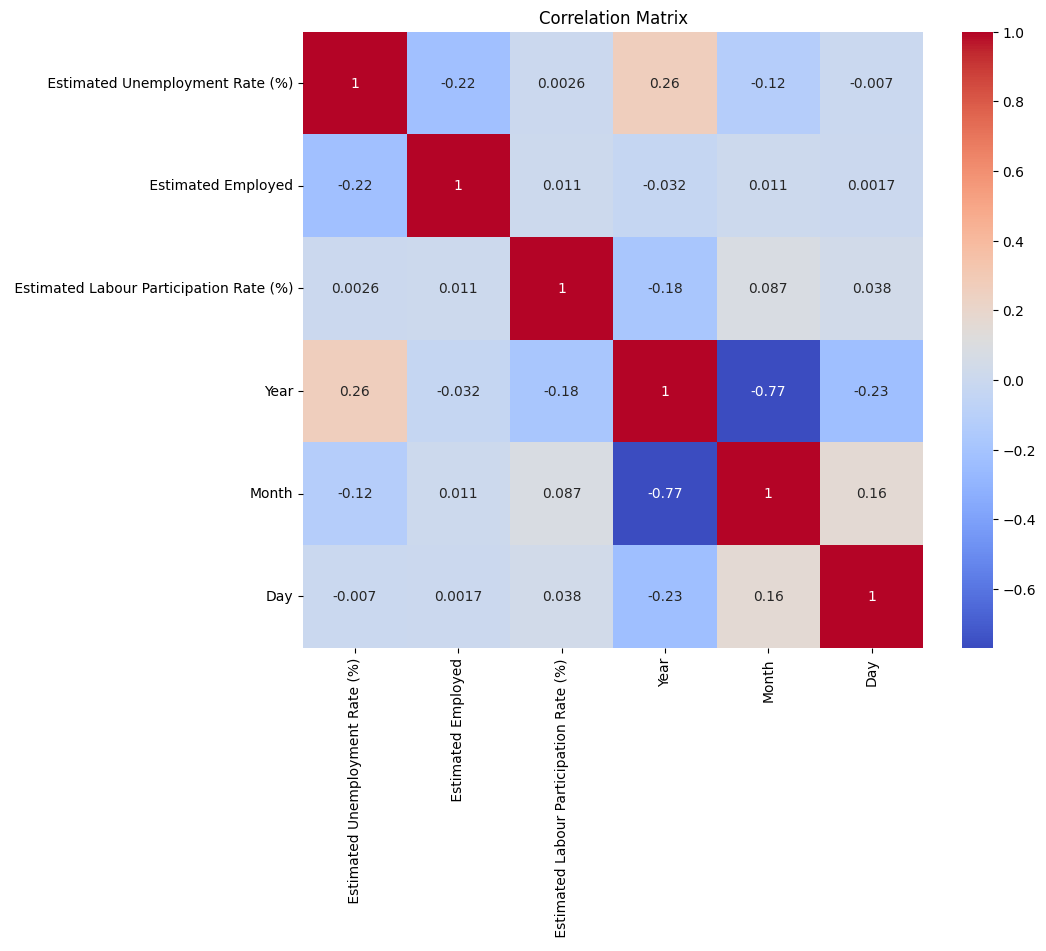

In [14]:
# Histograms of numeric features
data.hist(bins=20, figsize=(12, 8))
plt.show()

# Time series plot of the target variable
plt.figure(figsize=(12, 6))
plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)'])
plt.title('Time Series of Estimated Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

# Selecting only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# ploting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Based on the correlation results month feature have strong negative relation it may leads to over fitting we can ignore if required, but our data set have low data points so iam considering it for the analysis part

In [15]:
# Spliting the data into training and testing sets
X = data[['Region', ' Frequency', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area', 'Year', 'Month', 'Day']]
y = data[' Estimated Unemployment Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# model building
# ARIMA model
arima_order = (2, 1, 2)
arima_model = ARIMA(y_train, order=arima_order)
arima_model_fit = arima_model.fit()

# SARIMA model
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 12)
sarima_model = SARIMAX(y_train, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_model_fit = sarima_model.fit()

# Exponential Smoothing (ETS) model
ets_model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=12)
ets_model_fit = ets_model.fit()



In [16]:
# Forecast using the models
arima_predictions = arima_model_fit.forecast(steps=len(y_test))
sarima_predictions = sarima_model_fit.get_forecast(steps=len(y_test)).predicted_mean
ets_predictions = ets_model_fit.forecast(steps=len(y_test))


# Calculating MSE and RMSE for each model
arima_mse = mean_squared_error(y_test, arima_predictions)
sarima_mse = mean_squared_error(y_test, sarima_predictions)
ets_mse = mean_squared_error(y_test, ets_predictions)

arima_rmse = sqrt(arima_mse)
sarima_rmse = sqrt(sarima_mse)
ets_rmse = sqrt(ets_mse)

print(f'ARIMA - MSE: {arima_mse:.2f}, RMSE: {arima_rmse:.2f}')
print(f'SARIMA - MSE: {sarima_mse:.2f}, RMSE: {sarima_rmse:.2f}')
print(f'ETS - MSE: {ets_mse:.2f}, RMSE: {ets_rmse:.2f}')


ARIMA - MSE: 171.89, RMSE: 13.11
SARIMA - MSE: 176.56, RMSE: 13.29
ETS - MSE: 224.64, RMSE: 14.99


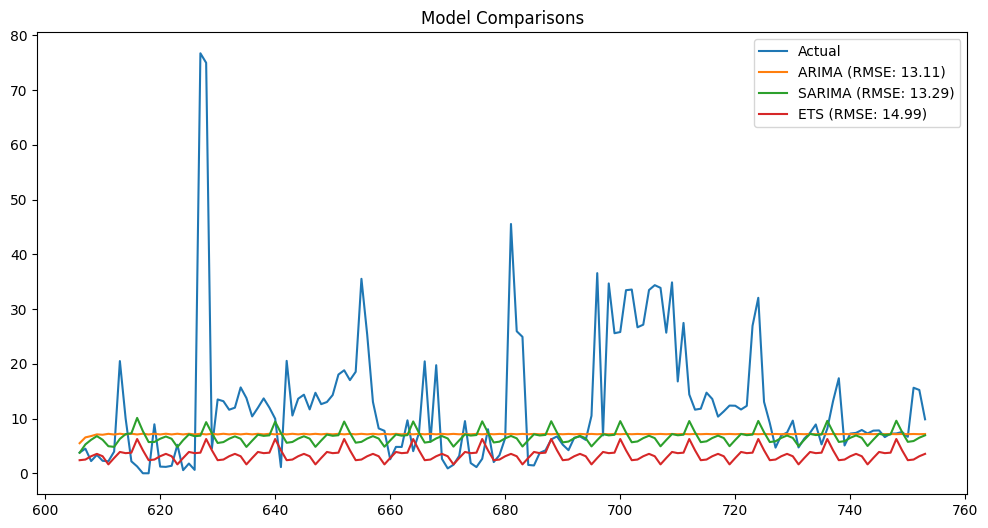

In [17]:
# Calculat RMSE for each model
arima_rmse = sqrt(mean_squared_error(y_test, arima_predictions))
sarima_rmse = sqrt(mean_squared_error(y_test, sarima_predictions))
ets_rmse = sqrt(mean_squared_error(y_test, ets_predictions))

# Visualize the forecasts
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, arima_predictions, label=f'ARIMA (RMSE: {arima_rmse:.2f})')
plt.plot(y_test.index, sarima_predictions, label=f'SARIMA (RMSE: {sarima_rmse:.2f})')
plt.plot(y_test.index, ets_predictions, label=f'ETS (RMSE: {ets_rmse:.2f})')
plt.legend()
plt.title('Model Comparisons')
plt.show()


ARIMA has the lowest RMSE and is likely the best-performing model for the prediction of the Unemployment rate